# Plotting the strain against time for BH binary before & after the merge(completed) 

In [13]:
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline
#everything is in standard unit SI
#define the global variables--------------------------------------------------------------------------------
c=2.9979e8    #speed of light
G=6.67e-11    #Gravitational const
Mpc=3.09e22     #paesec in m
D=100*Mpc       #assume the binary lie at 100Mpc
Msun = 2.e30 #solar mass
#----------------------------------------------------------------------------------------------------------


#mass of merging BHs two identical SMBHs
M1=15.0*Msun
M2=15.0*Msun

M_c = (((M1*M2)**3)/(M1+M2))**0.2    #Chirp mass
M = M1 + M2     #total mass of the binary
mu = (M1*M2)/(M1+M2)    #reduced mass of the binary

print ("The Chirp mass is " + str(M_c) + "kg")
#------------------------------------------------------------------------------------------------------------

The Chirp mass is 2.61165168989e+31kg


Defining the frequency and strain functions derived from GR and Newtonian.

In [14]:
#from Newtonian Virial theorem, the angular frequency of BH binary is

def omega(t): 
    return (-512. /5. *(G*M)**(5./3.) /c**5. *t)**(-3./8.) 

#strain(t) before Chandrasaeker frequency is reached

def h_0(t):
    return 4. * G / c**2. * M_c / D * (G / c**3. * omega(t) * M_c)**(2./3.)
#----------------------------------------------------------------------------------
#Switch frequency is omega_R in Hz

omega_R = 7.58 / (M /10 /Msun) *100
print ("the SMBH binary merge at the frequency omega_R =" + str(omega_R) +"Hz")

#switch strain at h(omega_R)

h_0_R = 4 * G / c**2 * M_c / D * (G / c**3 * omega_R * M_c)**(2/3)
print("the strain of the GW when SMBH binary merge is: " + str(h_0_R) + "m")

#After the merge, the strain shows exponential decay with constant frequency omega_R with characteristic time of t_R

t_R = 0.554 * (M / 10 /Msun) /100  # in second

print ("the characteristic time for the exponential decay of the amplitude of GW in the ringdoewn phase is: " + str(t_R) +"s")

#----------------------------------------------------------------------------------------------------------------

the SMBH binary merge at the frequency omega_R =252.666666667Hz
the strain of the GW when SMBH binary merge is: 2.50904422955e-20m
the characteristic time for the exponential decay of the amplitude of GW in the ringdoewn phase is: 0.01662s


# Frequency against time bofore the merge

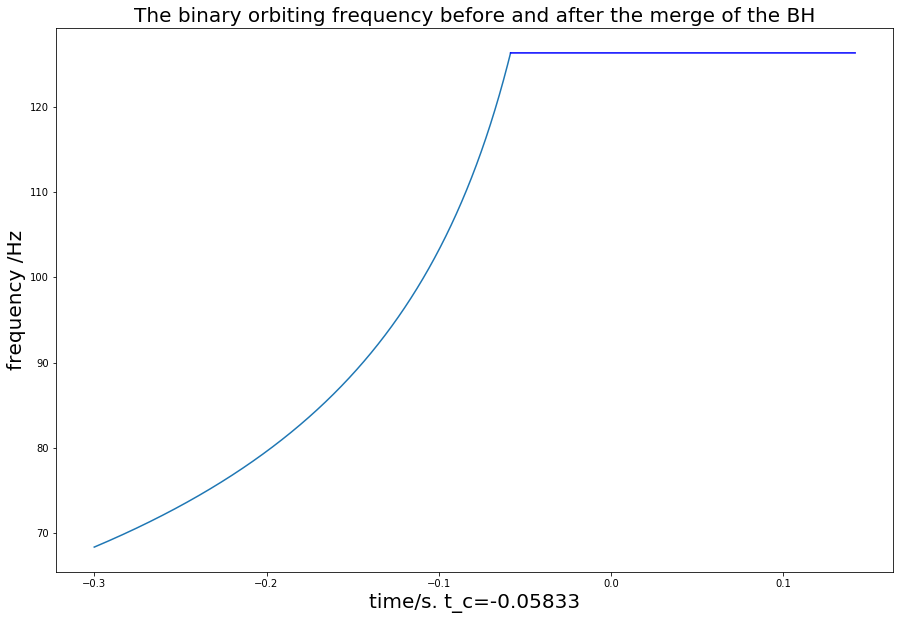

the time the binary merge is:-0.05833s
The frequency before the merge is:126.338870217
the SMBH binary merge at the Chandrasaeker frequency omega_R =252.666666667Hz
the frequency just before the berge from the Newtonian model is: 126.338870217Hz
the time of merge is -0.05833


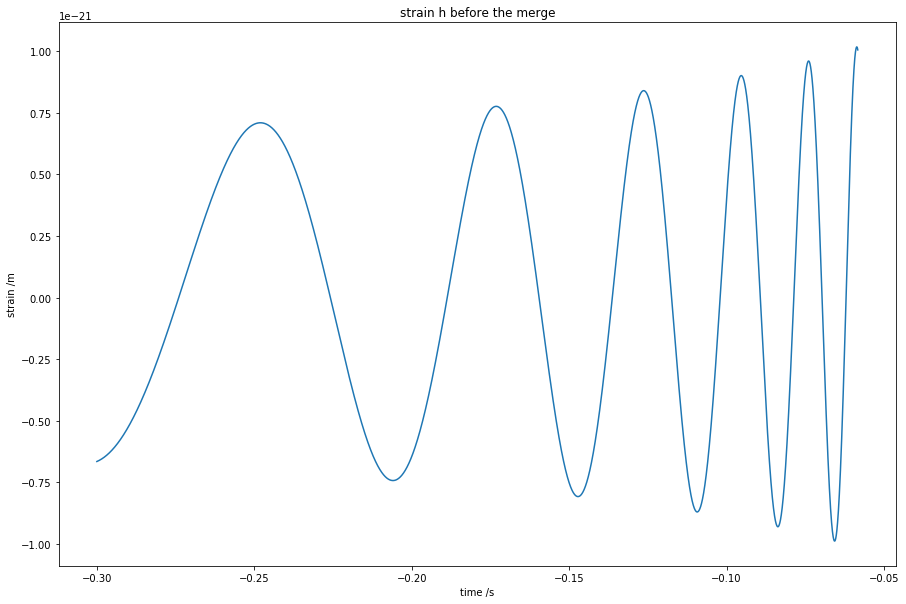

the strain just before the collision is:1.00407694342e-21m


In [33]:
Tlist=[]
omegalist=[]

i=0.
while omega(-0.3+0.00001*i) < omega_R/2: 
    i +=1.
    Tlist.append(-0.3+0.00001*i)
    omegalist.append(omega(-0.3+0.00001*i))
    
Tlist2=[]
omegalist2=[]
j=0 
for j in range(20000): 
    
    j +=1.
    Tlist2.append(0.00001*j+Tlist[-1])
    omegalist2.append(omegalist[-1])

plt.plot(Tlist, omegalist)
plt.plot(Tlist2,omegalist2, "b")
#plt.yscale('log')
plt.title("The binary orbiting frequency before and after the merge of the BH", fontsize=20)
plt.xlabel("time/s. t_c=-0.05833", fontsize=20)
plt.ylabel("frequency /Hz", fontsize=20)
plt.savefig('freq_time.png')
plt.show()
print("the time the binary merge is:" +str(Tlist[-1]) +"s")
print("The frequency before the merge is:" + str(omegalist[-1]))
print ("the SMBH binary merge at the Chandrasaeker frequency omega_R =" + str(omega_R) +"Hz")
print ("the frequency just before the berge from the Newtonian model is: " + str(omegalist[-1]) + "Hz")
print("the time of merge is " + str(Tlist[-1]))

    
    
t=0.
t_list=[]
h_list=[]
j=0.
while omega(-0.3+0.00001*j) < omega_R/2:# time from -0.1 till 0
    j+=1.
    t_list.append(-0.3+0.00001*j)
    h_list.append(h_0(-0.3+0.00001*j)*math.cos(2*omega(-0.3+0.00001*j)*-0.3+0.00001*j))
    
    
plt.plot(t_list, h_list)
plt.title("strain h before the merge")
plt.xlabel("time /s")
plt.ylabel("strain /m")
plt.show()

print ("the strain just before the collision is:" + str(h_list[-1]) + "m")

# strain after the merger

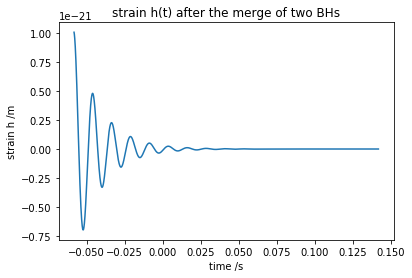

'\n#the merger phase\nk=0\nt_m=Tlist[-1]\nt_m_list = []\nh_m_list = []\nh_m=omegalist[-1]\nwhile Tlist[-1]+k*0.0000001 <0.0:\n    k +=1\n    t_m_list.append(Tlist[-1]+k*0.0000001)\n    h_m_list.append(h_list[-1])\n\n\nplt.plot(t_m_list, h_m_list)    \nplt.title("The merger phase strain (constant)")\n#plt.show()    \n\n'

In [17]:
h2_list=[]
t2_list=[]
for i in range(20000):
    t2_list.append(0.00001*i+t_list[-1])
    
    h2_list.append(h_list[-1] *math.cos(2*omegalist[-1] * 0.00001* i) *math.exp(-0.00001 * i / t_R))
    
plt.plot(t2_list, h2_list)
plt.title("strain h(t) after the merge of two BHs")
plt.xlabel("time /s")
plt.ylabel("strain h /m")
mpl.rcParams["figure.figsize"] = (15,10)
plt.show()

'''
#the merger phase
k=0
t_m=Tlist[-1]
t_m_list = []
h_m_list = []
h_m=omegalist[-1]
while Tlist[-1]+k*0.0000001 <0.0:
    k +=1
    t_m_list.append(Tlist[-1]+k*0.0000001)
    h_m_list.append(h_list[-1])


plt.plot(t_m_list, h_m_list)    
plt.title("The merger phase strain (constant)")
#plt.show()    

'''

# Combine the strain before and after the merge of SMBHs

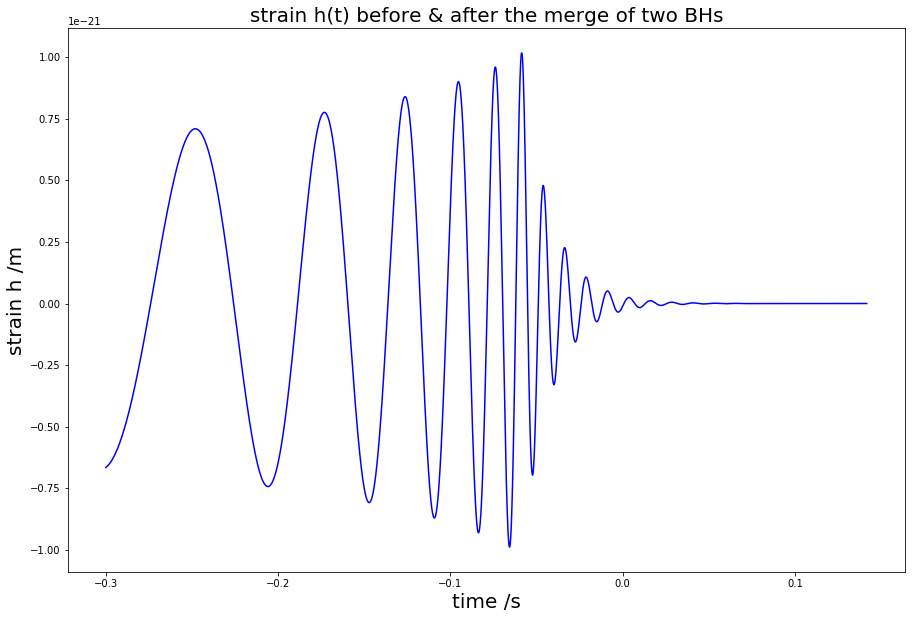

In [22]:
#Combining these
plt.plot(t_list, h_list, "b")

plt.plot(t2_list, h2_list, "b")
plt.title("strain h(t) before & after the merge of two BHs", fontsize=20)
plt.xlabel("time /s", fontsize=20)
plt.ylabel("strain h /m", fontsize=20)
mpl.rcParams["figure.figsize"] = (15,10)


plt.savefig("strain.png")
